In [1]:
## Census American Community Survey 5-year estimates; Demographics at county (city) geographic level


In [2]:
#see https://pygis.io/docs/d_access_census.html

In [3]:
# data source: 

In [4]:
# From https://www.census.gov/programs-surveys/acs/guidance/comparing-acs-data.html:
# "Due to the impact of the COVID-19 pandemic, the Census Bureau changed the 2020 ACS release. 
# Instead of providing the standard 1-year data products, the Census Bureau released experimental estimates from the 1-year data. 
# Data users should not compare 2020 ACS 1-year experimental estimates with any other data.""

In [5]:
# Dependencies
from census import Census
from config import (census_key)
from us import states
import numpy as np
import pandas as pd
#import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Census API key
c = Census(census_key)

In [6]:
import os

In [7]:
os.getcwd()

'C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\Medium-blog-post1\\census-demographics-city-level'

In [8]:
# need to change the working directory; be sure that the config file for the census API is also in this folder
#os.chdir('C:\\Users\\Jenkir\\Desktop\\ECO-iMPACT\\Medium-blog-post1')

In [9]:
os.getcwd()

'C:\\Users\\Jenkir\\Desktop\\cherry-tree-lane-analytics\\Medium-blog-post1\\census-demographics-city-level'

In [10]:
pd.set_option('display.max_rows', 200)

In [11]:
pd.set_option('max_colwidth', 200)

In [12]:
# Census American Community Survey 5-Year Data 
# For list of variables, see https://api.census.gov/data/2021/acs/acs5/variables.html
data = c.acs5.state_county(fields=('NAME', "B11005_002E","B19001_001E","B19301_001E","B15003_001E","B01003_001E", "B01002_001E",
                                         "B02001_002E", "B02001_003E","B03001_003E","B17001_002E","B17001_002E",
                                         "B19013_001E","B17001_002E","B23025_004E","B23025_005E","B15003_017E","B15003_021E",
                                         "B15003_022E","B25003_001E","B25003_002E","B02001_005E","B02001_008E","B25003_003E",
                                         "B19013A_001E","B19013B_001E","B19013D_001E","B19013G_001E","B19013G_001E",
                                         "B28003_005E", "B28003_006E"),
                                  state_fips = states.MD.fips,
                                  county_fips = "*",
                                  year = 2019)                          


In [13]:
# Create dataframe from the census data
counties_df = pd.DataFrame(data)


# Note, per https://www.census.gov/data/developers/data-sets/acs-1year/notes-on-acs-estimate-and-annotation-values.html,
# When estimate value is -666666666, it means estimate could not be computed bc there was insufficient number of sample observations.
counties_df

,NAME,B11005_002E,B19001_001E,B19301_001E,B15003_001E,B01003_001E,B01002_001E,B02001_002E,B02001_003E,B03001_003E,...,B02001_008E,B25003_003E,B19013A_001E,B19013B_001E,B19013D_001E,B19013G_001E,B28003_005E,B28003_006E,state,county
0,"Worcester County, Maryland",4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,1221.0,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,24,047
1,"Talbot County, Maryland",4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,1628.0,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,24,041
2,"Howard County, Maryland",43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,14160.0,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,24,027
3,"Prince George's County, Maryland",100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,26891.0,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,24,033
4,"Anne Arundel County, Maryland",69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,23351.0,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,24,003
5,"Baltimore County, Maryland",96036.0,313519.0,40105.0,575300.0,828018.0,39.4,501423.0,239308.0,44807.0,...,23112.0,106396.0,82334.0,68143.0,78245.0,73173.0,18773.0,25557.0,24,005
6,"Frederick County, Maryland",32990.0,92526.0,43582.0,170910.0,251422.0,39.1,202622.0,24411.0,24101.0,...,8337.0,22912.0,100271.0,76095.0,103710.0,82917.0,3994.0,6662.0,24,021
7,"Calvert County, Maryland",11665.0,31973.0,45783.0,62546.0,91511.0,40.7,74326.0,10709.0,3641.0,...,4041.0,4903.0,114801.0,70423.0,121845.0,106302.0,1304.0,1988.0,24,009
8,"Garrett County, Maryland",3370.0,12425.0,30617.0,21472.0,29235.0,46.2,28327.0,250.0,330.0,...,447.0,2654.0,52682.0,-666666666.0,81477.0,32778.0,991.0,1909.0,24,023
9,"Kent County, Maryland",1562.0,8025.0,36813.0,13933.0,19536.0,48.1,15774.0,2787.0,859.0,...,449.0,2468.0,66582.0,31742.0,-666666666.0,65521.0,752.0,1302.0,24,029


In [14]:
# Show number of null responses for each question by using the "missingno" python library
# Barplot - each bar represents column in the dataframe; 
# height of the bar indicates how complete the column is (i.e. how many non-null values are present)
# The top of the plot has series of numbers that represent total count of non-null values for that column
#msno.bar(counties_df2)

In [15]:
# Replace the value -666666666.0 with NaN (will later use dropna to remove rows with NaNs) for the entire dataframe
counties_df.replace(-666666666.0,np.nan, inplace=True)
counties_df

,NAME,B11005_002E,B19001_001E,B19301_001E,B15003_001E,B01003_001E,B01002_001E,B02001_002E,B02001_003E,B03001_003E,...,B02001_008E,B25003_003E,B19013A_001E,B19013B_001E,B19013D_001E,B19013G_001E,B28003_005E,B28003_006E,state,county
0,"Worcester County, Maryland",4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,1221.0,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,24,047
1,"Talbot County, Maryland",4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,1628.0,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,24,041
2,"Howard County, Maryland",43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,14160.0,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,24,027
3,"Prince George's County, Maryland",100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,26891.0,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,24,033
4,"Anne Arundel County, Maryland",69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,23351.0,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,24,003
5,"Baltimore County, Maryland",96036.0,313519.0,40105.0,575300.0,828018.0,39.4,501423.0,239308.0,44807.0,...,23112.0,106396.0,82334.0,68143.0,78245.0,73173.0,18773.0,25557.0,24,005
6,"Frederick County, Maryland",32990.0,92526.0,43582.0,170910.0,251422.0,39.1,202622.0,24411.0,24101.0,...,8337.0,22912.0,100271.0,76095.0,103710.0,82917.0,3994.0,6662.0,24,021
7,"Calvert County, Maryland",11665.0,31973.0,45783.0,62546.0,91511.0,40.7,74326.0,10709.0,3641.0,...,4041.0,4903.0,114801.0,70423.0,121845.0,106302.0,1304.0,1988.0,24,009
8,"Garrett County, Maryland",3370.0,12425.0,30617.0,21472.0,29235.0,46.2,28327.0,250.0,330.0,...,447.0,2654.0,52682.0,NaN,81477.0,32778.0,991.0,1909.0,24,023
9,"Kent County, Maryland",1562.0,8025.0,36813.0,13933.0,19536.0,48.1,15774.0,2787.0,859.0,...,449.0,2468.0,66582.0,31742.0,NaN,65521.0,752.0,1302.0,24,029


In [16]:
# Replace the census variable codes (such as "B19013_001E") in the dataframe with the name of the detailed table variables so it's understandable
# I have the table id numbers listed in order so that it is easy to see what tables I have included at this point - can rearrange the column order later
counties_df = counties_df.rename(columns={"B01003_001E": "Population",
                                      "B15003_001E": "Population 25 years and older",      
                                      "B01002_001E": "Median age", # universe: total population
                                      "B02001_003E": "Pop. Black", # universe: total population
                                      "B02001_002E": "Pop. white", # universe: total population
                                      "B02001_005E": "Pop. Asian",  # universe: total population      
                                      "B02001_008E": "Pop. 2 or more races", # universe: total population   
                                      "B03001_003E": "Pop. Hispanic origin", # universe: total population
                                      "B11005_002E": "Households with one or more people under 18 years",# universe: total households
                                      "B19301_001E":  "Per capita income", # universe: total population 
                                      "B15003_017E": "# persons age 25+ graduated high school", # universe: Population 25 years and over
                                      "B15003_021E": "# persons Associates degree",   # universe: Population 25 years and over
                                      "B15003_022E": "# persons age 25+ with Bachelors degree", # universe: Population 25 years and over
                                      "B17001_002E": " Persons for whom poverty status determined",    
                                      "B17001_002E": "Individuals- income below poverty level",# universe: persons for whom poverty status is determined
                                      "B19001_001E": "Total households",    
                                      "B19013_001E": "Median household income", # universe: total households
                                      "B19013A_001E": "Median HH income White", # universe: total households; "white alone householder"
                                      "B19013B_001E": "Median HH income Black", # universe: total households; "Black or African American Alone Householder"
                                      "B19013D_001E": "Median HH income Asian", # universe: total households; "Asian Alone Householder""
                                      "B19013G_001E": "Median HH income two or more races", # universe: total households
                                      "B19013G_001E": "Median HH income Hispanic/Latinx, any race", # universe: total households 
                                      "B19301_001E":  "Per capita income", # universe: total population
                                      "B23025_002E": "In labor force", # universe: Population 16 years and over
                                      "B23025_004E": "Employed civilians", # universe: Population 16 years and over
                                      "B23025_005E": "Unemployedment civilians", # universe: Population 16 years and over
                                      "B25003_001E": "Total occupied units", # universe: Housing units
                                      "B25003_002E": "Total owner-occupied units", # universe: Housing units
                                      "B25003_003E": "Total renter-occupied units", # universe: Housing units
                                      "B28003_005E": "# households with computer, no internet subscription", # universe: total households
                                      "B28003_006E": "# households no computer",  # universe: total households  
                                      })
counties_df.head()

,NAME,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,...,Pop. 2 or more races,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,state,county
0,"Worcester County, Maryland",4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,1221.0,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,24,047
1,"Talbot County, Maryland",4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,1628.0,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,24,041
2,"Howard County, Maryland",43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,14160.0,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,24,027
3,"Prince George's County, Maryland",100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,26891.0,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,24,033
4,"Anne Arundel County, Maryland",69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,23351.0,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,24,003


In [17]:
# rename column
counties_df = counties_df.rename(columns={"NAME":"County"})

In [18]:
counties_df.columns

Index(['County', 'Households with one or more people under 18 years',
       'Total households', 'Per capita income',
       'Population 25 years and older', 'Population', 'Median age',
       'Pop. white', 'Pop. Black', 'Pop. Hispanic origin',
       'Individuals- income below poverty level', 'Median household income',
       'Employed civilians', 'Unemployedment civilians',
       '# persons age 25+ graduated high school',
       '# persons Associates degree',
       '# persons age 25+ with Bachelors degree', 'Total occupied units',
       'Total owner-occupied units', 'Pop. Asian', 'Pop. 2 or more races',
       'Total renter-occupied units', 'Median HH income White',
       'Median HH income Black', 'Median HH income Asian',
       'Median HH income Hispanic/Latinx, any race',
       '# households with computer, no internet subscription',
       '# households no computer', 'state', 'county'],
      dtype='object')

In [19]:
counties_df[["Location", "State"]] = counties_df.County.str.split(",", expand=True)
counties_df.head()

,County,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,...,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,state,county,Location,State
0,"Worcester County, Maryland",4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,24,047,Worcester County,Maryland
1,"Talbot County, Maryland",4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,24,041,Talbot County,Maryland
2,"Howard County, Maryland",43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,24,027,Howard County,Maryland
3,"Prince George's County, Maryland",100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,24,033,Prince George's County,Maryland
4,"Anne Arundel County, Maryland",69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,24,003,Anne Arundel County,Maryland


In [20]:
# drop unnecessary columns
counties_df.drop(['state','county','State','County'], axis=1, inplace=True)
counties_df.head()

,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,Individuals- income below poverty level,...,Pop. Asian,Pop. 2 or more races,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Location
0,4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,4606.0,...,618.0,1221.0,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,Worcester County
1,4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,3179.0,...,503.0,1628.0,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,Talbot County
2,43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,15805.0,...,57613.0,14160.0,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,Howard County
3,100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,75341.0,...,37453.0,26891.0,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,Prince George's County
4,69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,32087.0,...,21605.0,23351.0,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,Anne Arundel County


In [21]:
# check data types of the column values
counties_df.dtypes

Households with one or more people under 18 years       float64
Total households                                        float64
Per capita income                                       float64
Population 25 years and older                           float64
Population                                              float64
Median age                                              float64
Pop. white                                              float64
Pop. Black                                              float64
Pop. Hispanic origin                                    float64
Individuals- income below poverty level                 float64
Median household income                                 float64
Employed civilians                                      float64
Unemployedment civilians                                float64
# persons age 25+ graduated high school                 float64
# persons Associates degree                             float64
# persons age 25+ with Bachelors degree 

In [22]:
# Add column for Percent Black 
counties_df["Percent Black"] =(100 * \
    counties_df["Pop. Black"].astype(
        int) / counties_df["Population"].astype(
        int)).round(1) 



In [23]:
counties_df["Percent white"] =(100 * \
    counties_df["Pop. white"].astype(
        int) / counties_df["Population"].astype(
        int)).round(1) 

counties_df.head()

,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,Individuals- income below poverty level,...,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Location,Percent Black,Percent white
0,4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,4606.0,...,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,Worcester County,12.9,83.0
1,4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,3179.0,...,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,Talbot County,10.5,82.9
2,43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,15805.0,...,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,Howard County,18.9,57.0
3,100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,75341.0,...,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,Prince George's County,62.7,16.6
4,69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,32087.0,...,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,Anne Arundel County,16.8,72.7


In [24]:
# remove word "County" from all values in "Location" column
counties_df['Location'] = counties_df['Location'].str.replace('County', '')
counties_df

,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,Individuals- income below poverty level,...,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Location,Percent Black,Percent white
0,4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,4606.0,...,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,Worcester,12.9,83.0
1,4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,3179.0,...,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,Talbot,10.5,82.9
2,43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,15805.0,...,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,Howard,18.9,57.0
3,100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,75341.0,...,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,Prince George's,62.7,16.6
4,69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,32087.0,...,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,Anne Arundel,16.8,72.7
5,96036.0,313519.0,40105.0,575300.0,828018.0,39.4,501423.0,239308.0,44807.0,73061.0,...,106396.0,82334.0,68143.0,78245.0,73173.0,18773.0,25557.0,Baltimore,28.9,60.6
6,32990.0,92526.0,43582.0,170910.0,251422.0,39.1,202622.0,24411.0,24101.0,16865.0,...,22912.0,100271.0,76095.0,103710.0,82917.0,3994.0,6662.0,Frederick,9.7,80.6
7,11665.0,31973.0,45783.0,62546.0,91511.0,40.7,74326.0,10709.0,3641.0,4183.0,...,4903.0,114801.0,70423.0,121845.0,106302.0,1304.0,1988.0,Calvert,11.7,81.2
8,3370.0,12425.0,30617.0,21472.0,29235.0,46.2,28327.0,250.0,330.0,2963.0,...,2654.0,52682.0,NaN,81477.0,32778.0,991.0,1909.0,Garrett,0.9,96.9
9,1562.0,8025.0,36813.0,13933.0,19536.0,48.1,15774.0,2787.0,859.0,2059.0,...,2468.0,66582.0,31742.0,NaN,65521.0,752.0,1302.0,Kent,14.3,80.7


In [25]:
# change order of columns in df
counties_df = counties_df[["Location","Households with one or more people under 18 years",
       "Total households", "Per capita income",
       "Population 25 years and older", "Population", "Median age",
       "Pop. white", "Pop. Black", "Pop. Hispanic origin",
       "Individuals- income below poverty level", "Median household income",
       "Employed civilians", "Unemployedment civilians",
       "# persons age 25+ graduated high school",
       "# persons Associates degree",
       "# persons age 25+ with Bachelors degree", "Total occupied units",
       "Total owner-occupied units", "Pop. Asian", "Pop. 2 or more races",
       "Total renter-occupied units", "Median HH income White",
       "Median HH income Black", "Median HH income Asian",
       "Median HH income Hispanic/Latinx, any race",
       "# households with computer, no internet subscription",
       "# households no computer","Percent Black", "Percent white"]]
counties_df.head()

,Location,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,...,Pop. 2 or more races,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Percent Black,Percent white
0,Worcester,4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,1221.0,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,12.9,83.0
1,Talbot,4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,1628.0,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,10.5,82.9
2,Howard,43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,14160.0,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,18.9,57.0
3,Prince George's,100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,26891.0,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,62.7,16.6
4,Anne Arundel,69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,23351.0,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,16.8,72.7


In [26]:
counties_df.shape

(24, 30)

In [27]:
# Use dropna to remove rows (counties) with NaNs
MD_counties2 = counties_df.dropna(axis=0, how='any')
MD_counties2.shape

(18, 30)

In [28]:
# Create function ("diff") for subtracting the columns, by taking column data as arguments and then using apply method 
# Create new column "HH income gap" for difference between "Median HH income White" and "Median HH income Black" columns
MD_counties1 =  MD_counties2.copy()

def diff(a,b):
    return b - a

MD_counties1["HH_income_gap"] = MD_counties1.apply(
            lambda x: diff(x["Median HH income Black"], x["Median HH income White"]), axis=1)
MD_counties1

,Location,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,...,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Percent Black,Percent white,HH_income_gap
0,Worcester,4684.0,22089.0,38080.0,39386.0,51765.0,50.4,42965.0,6659.0,1811.0,...,5507.0,66448.0,39614.0,117154.0,92596.0,1352.0,2542.0,12.9,83.0,26834.0
1,Talbot,4256.0,16826.0,49136.0,27939.0,37167.0,50.5,30818.0,3887.0,2513.0,...,4998.0,78500.0,39474.0,72500.0,81583.0,958.0,1440.0,10.5,82.9,39026.0
2,Howard,43338.0,114170.0,54628.0,215300.0,318855.0,38.8,181711.0,60232.0,22012.0,...,30650.0,131332.0,94192.0,134635.0,107102.0,3611.0,3706.0,18.9,57.0,37140.0
3,Prince George's,100967.0,311343.0,37191.0,616274.0,908670.0,37.1,150782.0,569478.0,167498.0,...,118080.0,92392.0,85576.0,96080.0,83370.0,24163.0,17743.0,62.7,16.6,6816.0
4,Anne Arundel,69265.0,209814.0,46629.0,393584.0,571275.0,38.3,415470.0,95710.0,44621.0,...,54197.0,105768.0,82360.0,100921.0,92992.0,8676.0,11221.0,16.8,72.7,23408.0
5,Baltimore,96036.0,313519.0,40105.0,575300.0,828018.0,39.4,501423.0,239308.0,44807.0,...,106396.0,82334.0,68143.0,78245.0,73173.0,18773.0,25557.0,28.9,60.6,14191.0
6,Frederick,32990.0,92526.0,43582.0,170910.0,251422.0,39.1,202622.0,24411.0,24101.0,...,22912.0,100271.0,76095.0,103710.0,82917.0,3994.0,6662.0,9.7,80.6,24176.0
7,Calvert,11665.0,31973.0,45783.0,62546.0,91511.0,40.7,74326.0,10709.0,3641.0,...,4903.0,114801.0,70423.0,121845.0,106302.0,1304.0,1988.0,11.7,81.2,44378.0
10,Montgomery,130477.0,370950.0,54510.0,717900.0,1043530.0,39.2,553846.0,192639.0,203754.0,...,128318.0,128074.0,75960.0,117853.0,98998.0,17266.0,13803.0,18.5,53.1,52114.0
11,Carroll,20104.0,60758.0,42083.0,116607.0,167699.0,42.4,153534.0,5924.0,5921.0,...,10935.0,97238.0,87457.0,88523.0,96012.0,3195.0,4895.0,3.5,91.6,9781.0


In [29]:
# Change the data type for all columns with float64 to int
for column in MD_counties1.columns:
    if MD_counties1[column].dtype == 'float64':
        MD_counties1[column] = MD_counties1[column].astype(int)

MD_counties1.dtypes

Location                                                object
Households with one or more people under 18 years        int32
Total households                                         int32
Per capita income                                        int32
Population 25 years and older                            int32
Population                                               int32
Median age                                               int32
Pop. white                                               int32
Pop. Black                                               int32
Pop. Hispanic origin                                     int32
Individuals- income below poverty level                  int32
Median household income                                  int32
Employed civilians                                       int32
Unemployedment civilians                                 int32
# persons age 25+ graduated high school                  int32
# persons Associates degree                            

In [30]:
MD_counties = MD_counties1.sort_values(["HH_income_gap"], ascending = False)
MD_counties

,Location,Households with one or more people under 18 years,Total households,Per capita income,Population 25 years and older,Population,Median age,Pop. white,Pop. Black,Pop. Hispanic origin,...,Total renter-occupied units,Median HH income White,Median HH income Black,Median HH income Asian,"Median HH income Hispanic/Latinx, any race","# households with computer, no internet subscription",# households no computer,Percent Black,Percent white,HH_income_gap
10,Montgomery,130477,370950,54510,717900,1043530,39,553846,192639,203754,...,128318,128074,75960,117853,98998,17266,13803,18,53,52114
13,St. Mary's,14407,40552,40354,74327,112290,36,87625,16431,5819,...,11741,98798,49848,121063,88941,2884,3766,14,78,48950
12,Queen Anne's,5702,18577,44754,35106,49632,44,44328,3302,1955,...,3531,100691,53313,64191,81136,1216,1240,6,89,47378
7,Calvert,11665,31973,45783,62546,91511,40,74326,10709,3641,...,4903,114801,70423,121845,106302,1304,1988,11,81,44378
1,Talbot,4256,16826,49136,27939,37167,50,30818,3887,2513,...,4998,78500,39474,72500,81583,958,1440,10,82,39026
20,Baltimore city,59786,239116,31271,423638,609032,35,185489,379751,32183,...,125529,77444,39088,61327,55643,27955,34298,62,30,38356
2,Howard,43338,114170,54628,215300,318855,38,181711,60232,22012,...,30650,131332,94192,134635,107102,3611,3706,18,57,37140
0,Worcester,4684,22089,38080,39386,51765,50,42965,6659,1811,...,5507,66448,39614,117154,92596,1352,2542,12,83,26834
18,Cecil,11892,37058,34810,70955,102552,40,90069,6974,4525,...,9993,79835,53171,66974,44980,2426,3396,6,87,26664
6,Frederick,32990,92526,43582,170910,251422,39,202622,24411,24101,...,22912,100271,76095,103710,82917,3994,6662,9,80,24176


In [31]:
income_gap_df = MD_counties[["Location", "Population", "Pop. Black", "Pop. white", "Percent Black", "Percent white",
                             "Median HH income Black", "Median HH income White", "HH_income_gap"]]

In [32]:
income_gap_df.reset_index(drop=True,inplace=True)
income_gap_df

,Location,Population,Pop. Black,Pop. white,Percent Black,Percent white,Median HH income Black,Median HH income White,HH_income_gap
0,Montgomery,1043530,192639,553846,18,53,75960,128074,52114
1,St. Mary's,112290,16431,87625,14,78,49848,98798,48950
2,Queen Anne's,49632,3302,44328,6,89,53313,100691,47378
3,Calvert,91511,10709,74326,11,81,70423,114801,44378
4,Talbot,37167,3887,30818,10,82,39474,78500,39026
5,Baltimore city,609032,379751,185489,62,30,39088,77444,38356
6,Howard,318855,60232,181711,18,57,94192,131332,37140
7,Worcester,51765,6659,42965,12,83,39614,66448,26834
8,Cecil,102552,6974,90069,6,87,53171,79835,26664
9,Frederick,251422,24411,202622,9,80,76095,100271,24176


In [33]:
# Export file as a CSV, without the Pandas index, but with the header
# income_gap_df.to_csv("MD_counties_income.csv", index = False, header=True)

## CHARTS

In [34]:
# Plotly dashboard example   https://towardsdatascience.com/creating-an-interactive-dashboard-with-dash-plotly-using-crime-data-a217da841df3

In [35]:
# Use matplotlib to create bar chart
# See https://towardsdatascience.com/7-steps-to-help-you-make-your-matplotlib-bar-charts-beautiful-f87419cb14cb

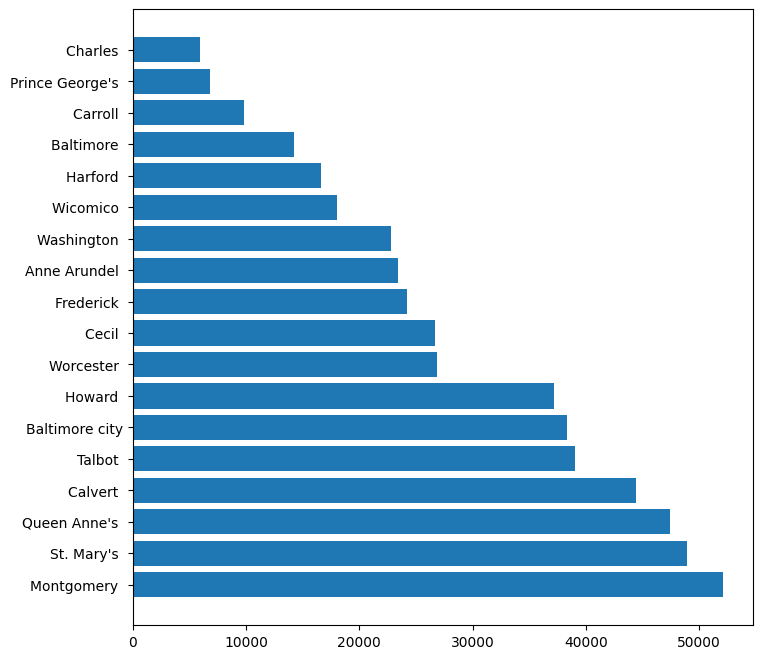

In [36]:
# set up fig and ax variables, set in plt.subplots()
# Within this function, we can pass in figure size
# barh changes the bar chart to horizontal so counties are easier to read
fig, ax = plt.subplots(figsize=(8,8))
bars = plt.barh(income_gap_df['Location'], income_gap_df["HH_income_gap"])

plt.show()

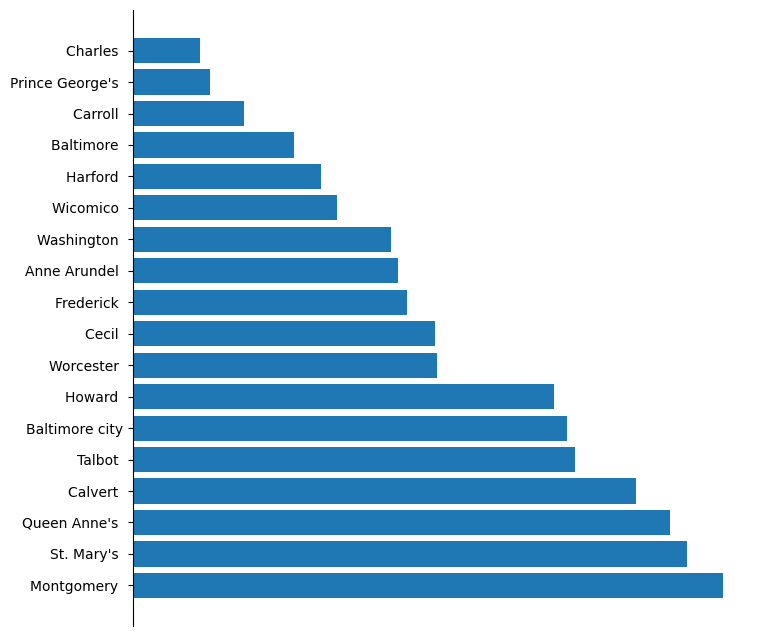

In [37]:
fig, ax = plt.subplots(figsize=(8,8))
bars = plt.barh(income_gap_df['Location'], income_gap_df["HH_income_gap"])

# remove edges of chart by using ax.spines
ax.spines[['right','top', 'bottom']].set_visible(False)
# hide x axis
ax.xaxis.set_visible(False)
plt.show()

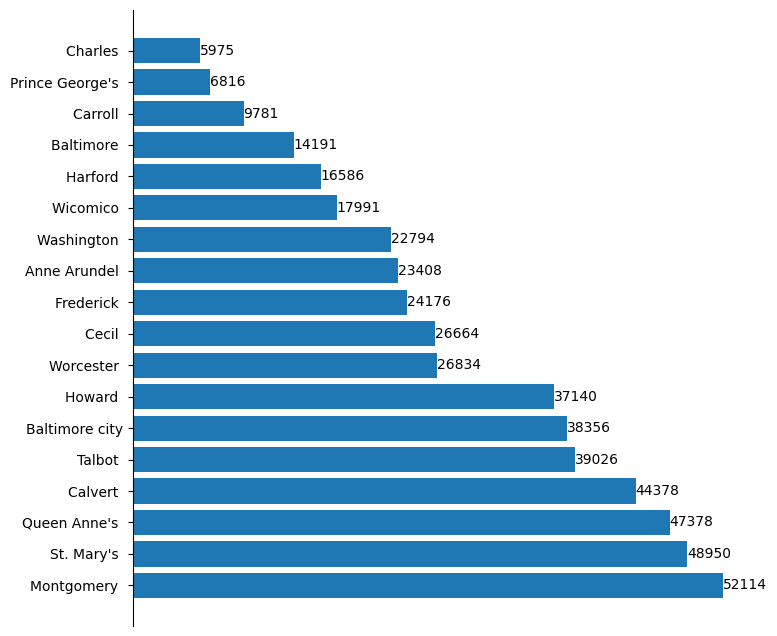

In [38]:
fig, ax = plt.subplots(figsize=(8,8))
bars = plt.barh(income_gap_df['Location'], income_gap_df["HH_income_gap"])

# remove edges of chart by using ax.spines
ax.spines[['right','top', 'bottom']].set_visible(False)

# hide x axis
ax.xaxis.set_visible(False)

# use matplotlib bar_label function to add labels for income gap amounts
ax.bar_label(bars)

plt.show()

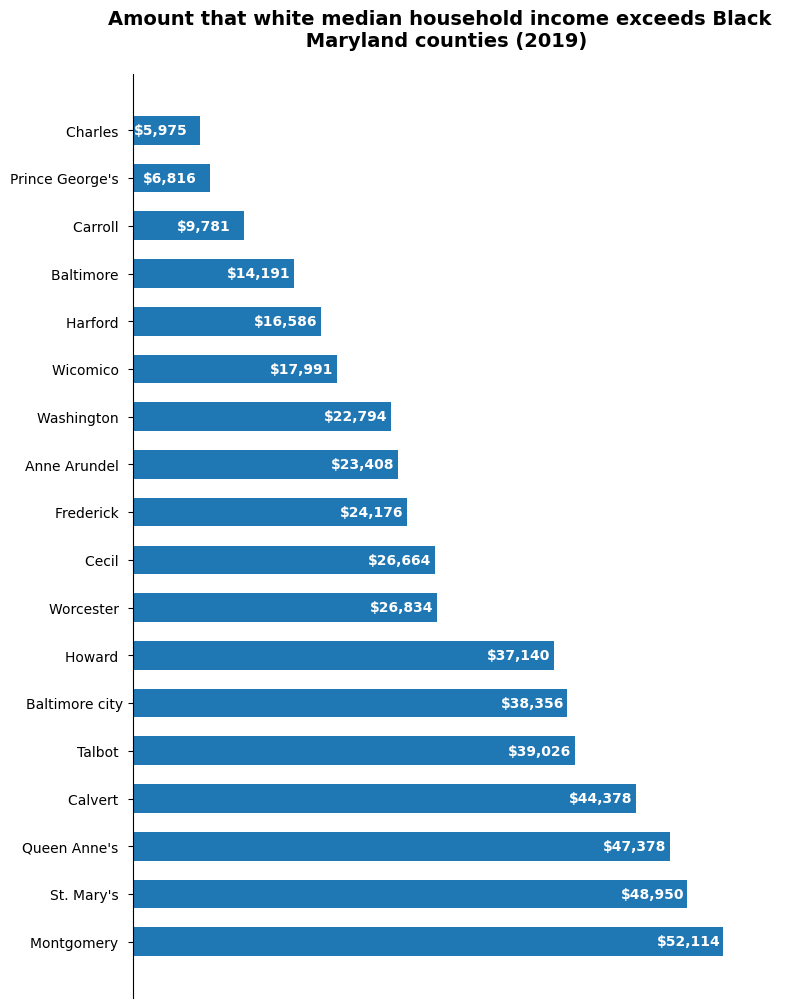

In [42]:
#increase spacing between bars by 1st increasing height of figure in plt.subplots() function call &
# then adding height parameter to plt.barh() function
fig, ax = plt.subplots(figsize=(8,12))
bars = plt.barh(income_gap_df['Location'], income_gap_df["HH_income_gap"], height=0.6)

# remove edges of chart by using ax.spines
ax.spines[['right','top', 'bottom']].set_visible(False)

# hide x axis
ax.xaxis.set_visible(False)

# use matplotlib bar_label function to add labels for income gap amounts
ax.bar_label(bars, padding=-48, color='white',fontsize=10, fontweight='bold',label_type='edge',
             labels=[f'${x:,.0f}' for x in bars.datavalues])

ax.set_title("Amount that white median household income exceeds Black \n Maryland counties (2019)",
            fontsize=14, fontweight='bold', pad=20)

# note that you need to savefig before plt.show or it will result in a blank image
plt.savefig('incomegap2019.png', bbox_inches='tight')

plt.show()
